In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [4]:
coverage_df

,0.5,1,2,4,Tree val,Naive
0,1.00,0.00,0.000000,0.000000,1.000000,0.750000
1,0.75,0.75,0.000000,0.666667,1.000000,1.000000
2,1.00,1.00,0.250000,0.000000,1.000000,1.000000
3,1.00,1.00,0.333333,0.000000,1.000000,0.333333
4,1.00,1.00,0.250000,0.000000,1.000000,0.750000
...,...,...,...,...,...,...
45,1.00,0.75,1.000000,0.000000,1.000000,1.000000
46,1.00,1.00,0.000000,0.000000,1.000000,0.750000
47,1.00,1.00,1.000000,0.000000,0.666667,0.666667
48,1.00,0.50,0.000000,0.500000,1.000000,1.000000


In [5]:
length_df

,0.5,1,2,4,Tree val,Naive
0,7.189050,10.287410,13.780192,11.106062,9.446893,2.374976
1,5.465373,5.410896,3.322520,2.638987,51.041103,2.380524
2,8.070771,13.394579,12.099189,10.474318,14.113655,2.311606
3,8.443825,8.472777,5.789223,8.834435,4.702656,2.763298
4,8.265723,9.930947,21.378122,7.854394,5.072773,2.446418
...,...,...,...,...,...,...
45,9.861120,11.271276,11.788603,9.151104,25.693863,1.826891
46,9.694987,13.164476,13.081416,6.239940,4.118686,2.173138
47,6.776685,4.626781,7.661706,7.349368,8.036237,1.838151
48,12.169486,11.705020,10.614596,17.935571,11.972986,2.112253


In [6]:
MSE_df

,0.5,1,2,4,Tree val,Naive
0,4.165064,4.165064,4.061124,3.549031,3.732954,3.732954
1,5.535602,5.146498,4.979869,4.917975,4.999033,4.999033
2,5.199135,5.181709,5.520765,5.152263,4.725472,4.725472
3,6.766394,6.766394,6.781073,6.773603,6.766394,6.766394
4,5.395052,5.641457,5.257011,5.365586,5.641457,5.641457
...,...,...,...,...,...,...
45,4.046145,4.545105,4.082926,4.147128,4.269164,4.269164
46,4.715816,4.781129,4.711473,4.718174,4.715816,4.715816
47,4.219757,3.823741,3.963122,3.841273,4.117060,4.117060
48,3.749291,3.699349,3.497796,3.221534,3.346639,3.346639


In [9]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,50)
        elif metric == "MSE":
            axes[i].set_ylim(0,50)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.5         0.940667
1           0.816500
2           0.546667
4           0.211667
Tree val    0.901500
Naive       0.754333
dtype: float64
Length :
 0.5         12.135415
1           12.746640
2           12.247577
4           31.291127
Tree val    22.064417
Naive        2.247075
dtype: float64
MSE :
 0.5         4.776142
1           4.773470
2           4.778403
4           4.746250
Tree val    4.719548
Naive       4.719548
dtype: float64


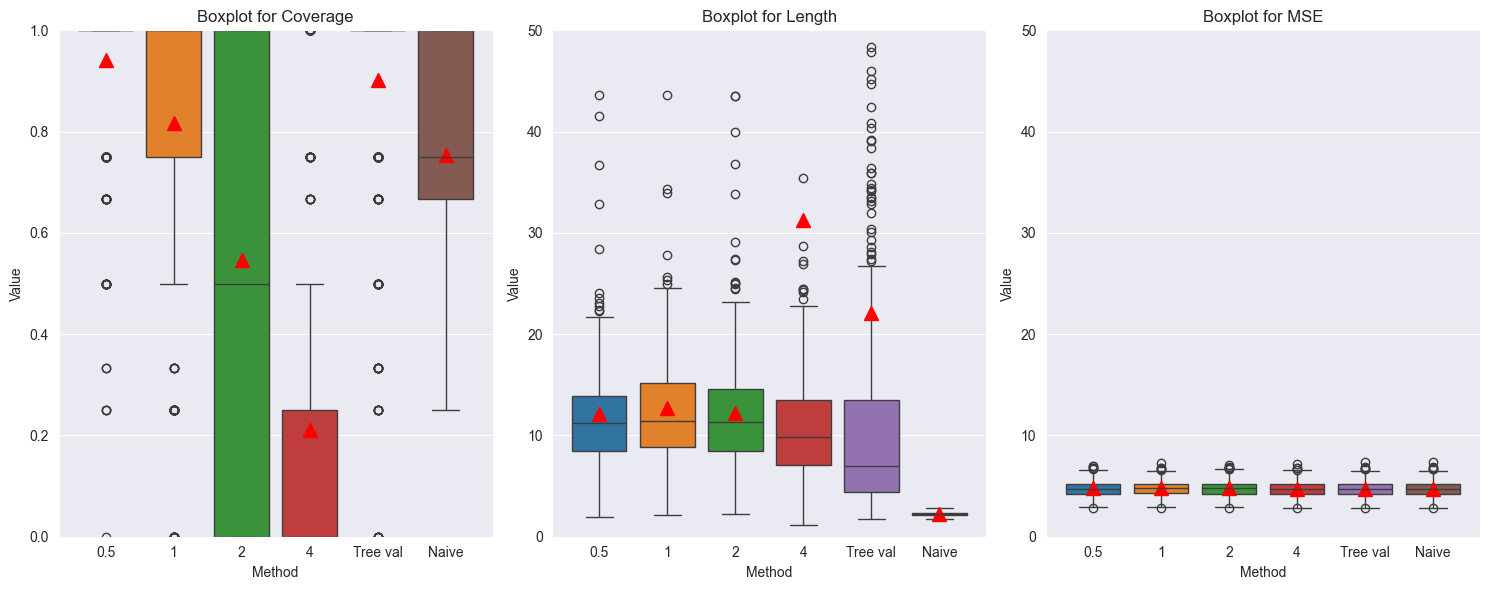

In [10]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])